# Grade: /100 pts

# Assignment 06: Regularization

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question 1: Preprocessing (5 pts)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [4]:
# Load the data from 'footballer_small.csv'
data = pd.read_csv('footballer_small.csv')

# Drop the specified columns
columns_to_drop = ['ID', 'club', 'club_logo', 'flag', 'nationality', 'photo', 'potential', 'birth_date']
data = data.drop(columns=columns_to_drop)

# Dummy code the specified variables without dropping the first column
data = pd.get_dummies(data, columns=['work_rate_att', 'work_rate_def', 'preferred_foot'], drop_first=False)

# Split the data to get a test set of size 500 with random_state set to 0
train_data, test_data = train_test_split(data, test_size=500, random_state=0)


## Question 2: Building the pipeline that preprocesses the data (10 pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. Build the pipeline that preprocesses the feature columns of the training data and create a linear regression model. Plot the data before and after the standardization for the stamina feature. <br>
In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises. <br>
### Question
Make observations about the plot.  

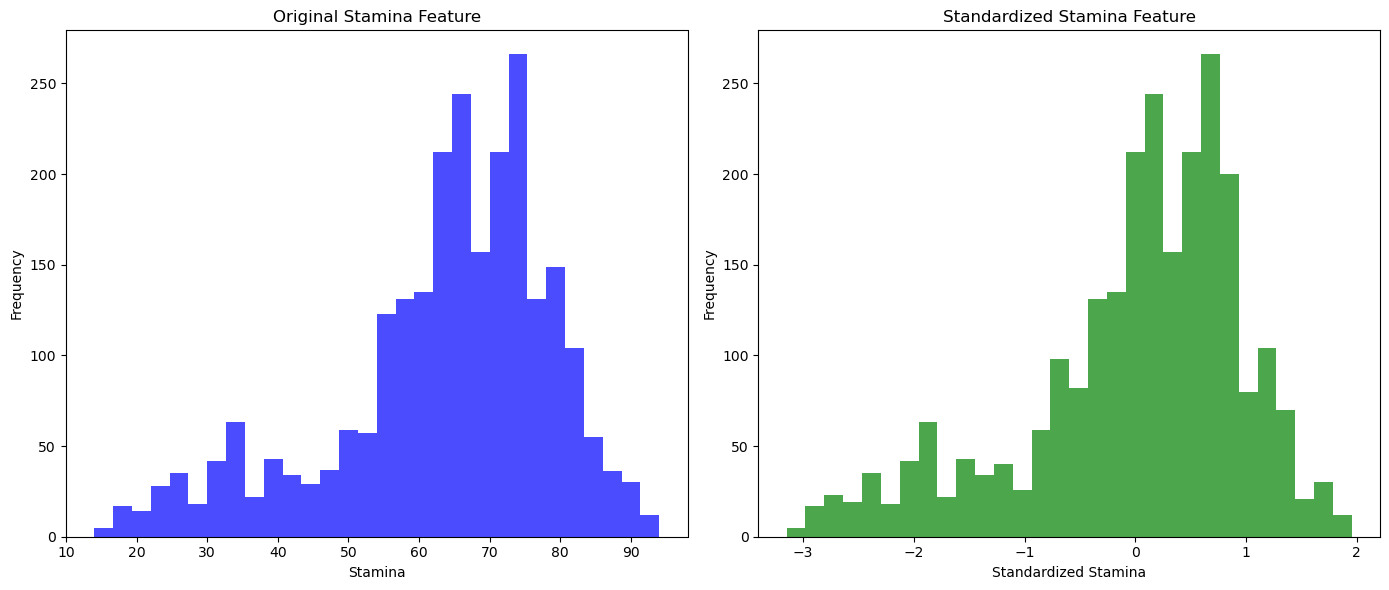

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right
311,20,190.0,81.0,61,57,24,44,49,60,64,1,2,3,38,22,62,56,20,42,21,20,58,56,58,56,59,55,52,35,66,55,73,19,51,61,22,30,24,52,58,61,False,False,True,False,False,True,True,False
1025,24,183.0,71.0,67,78,65,62,71,44,63,1,2,3,63,65,61,67,67,72,59,48,62,70,79,78,75,61,75,68,45,65,65,63,59,40,60,56,66,62,40,45,False,False,True,False,False,True,False,True
1587,27,193.0,83.0,60,64,57,55,63,60,52,1,1,4,12,12,19,34,12,11,20,16,25,23,59,61,66,57,51,25,52,28,71,18,38,21,11,18,16,45,13,19,False,False,True,False,False,True,False,True
2941,29,175.0,71.0,70,76,66,71,70,27,60,1,3,3,76,63,37,66,58,69,80,70,70,69,77,76,77,66,76,70,72,66,61,72,47,30,62,73,63,70,17,32,False,False,True,False,False,True,False,True
2980,29,189.0,85.0,67,66,68,63,72,59,64,1,1,3,14,14,15,14,22,19,21,14,13,22,46,70,74,60,49,22,46,45,75,15,42,30,12,61,20,35,31,14,False,False,True,False,False,True,False,True


In [5]:
# Use 'overall' as the prediction target
features = train_data.drop(columns=['overall'])
target = train_data['overall']

# Build a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

# Fit the pipeline to the training data
pipeline.fit(features, target)

# Standardize the 'stamina' feature separately for plotting
scaler = StandardScaler()
standardized_stamina = scaler.fit_transform(train_data[['stamina']])

# Plot the data before and after standardization for the 'stamina' feature
plt.figure(figsize=(14, 6))

# Plot original 'stamina' feature
plt.subplot(1, 2, 1)
plt.hist(train_data['stamina'], bins=30, color='blue', alpha=0.7)
plt.title('Original Stamina Feature')
plt.xlabel('Stamina')
plt.ylabel('Frequency')

# Plot standardized 'stamina' feature
plt.subplot(1, 2, 2)
plt.hist(standardized_stamina, bins=30, color='green', alpha=0.7)
plt.title('Standardized Stamina Feature')
plt.xlabel('Standardized Stamina')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display the first few rows of the test data to verify
test_data.head()

### Observations about the Stamina Feature Plots

- **Original Stamina Feature (left plot)**: This histogram shows the distribution of stamina values in their original scale, which ranges roughly from 10 to 90.

- **Standardized Stamina Feature (right plot)**: This histogram shows the same data after standardization, where the feature values have been transformed to have a mean of 0 and a standard deviation of 1. This process helps in normalizing the feature and ensuring that all features have the same influence during model training.

Although the shape of both histograms is similar (as expected), the units on the x-axis have changed because of the standardization. This is a typical transformation applied to ensure no feature dominates others in scale-sensitive models like linear regression or Ridge regression.


## Question 3: Creating a Complex feature model using 2-nd Polynomial features (10 pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 
Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

#### Hint: 
For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets. 
### Questions:
* How many linear terms are in each of the new feature set?
* How many squared terms are in each of the new feature set?
* How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms. 

In [6]:
# Define features and target variable
features_all = train_data.drop(columns=['overall'])
target = train_data['overall']

# List of features to exclude for each training set
exclusions = [None, 'standing_tackle', 'composure', 'marking']

# Create a dictionary to store the transformed feature sets
transformed_feature_sets = {}

# Generate the four training sets with polynomial features
for i, exclude_feature in enumerate(exclusions):
    # Exclude specified feature (if any) from the training data
    if exclude_feature:
        features = features_all.drop(columns=[exclude_feature])
    else:
        features = features_all

    # Apply PolynomialFeatures with degree=2
    poly = PolynomialFeatures(degree=2, include_bias=False)
    transformed_features = poly.fit_transform(features)
    
    # Store the transformed feature set
    transformed_feature_sets[f"set_{i+1}"] = transformed_features

    # Display information about the terms in the polynomial feature set
    feature_names = poly.get_feature_names_out(features.columns)
    num_linear_terms = len(features.columns)  # Original features
    num_squared_terms = num_linear_terms  # Each feature squared
    num_interaction_terms = len(feature_names) - num_linear_terms - num_squared_terms

    print(f"Feature set {i+1} ({'All features' if not exclude_feature else f'Excluding {exclude_feature}'}):")
    print(f"  - Linear terms: {num_linear_terms}")
    print(f"  - Squared terms: {num_squared_terms}")
    print(f"  - Interaction terms: {num_interaction_terms}")
    print(f"  - Example interaction term: {feature_names[num_linear_terms + num_squared_terms]}")
    print()

Feature set 1 (All features):
  - Linear terms: 48
  - Squared terms: 48
  - Interaction terms: 1128
  - Example interaction term: height_cm^2

Feature set 2 (Excluding standing_tackle):
  - Linear terms: 47
  - Squared terms: 47
  - Interaction terms: 1081
  - Example interaction term: height_cm^2

Feature set 3 (Excluding composure):
  - Linear terms: 47
  - Squared terms: 47
  - Interaction terms: 1081
  - Example interaction term: height_cm^2

Feature set 4 (Excluding marking):
  - Linear terms: 47
  - Squared terms: 47
  - Interaction terms: 1081
  - Example interaction term: height_cm^2



## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the training sets created in question 3. Use 10-fold cross validation to report the validation error on the training set using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. 

In [7]:
# Dictionary to store MSE results for each training set
validation_errors = {}

# Perform 10-fold cross-validation for each feature set
for i in range(1, 5):
    feature_set = transformed_feature_sets[f"set_{i}"]
    
    # Run cross-validation and store the validation MSE for each set
    mse_scores = cross_val_score(pipeline, feature_set, target, cv=10, scoring='neg_mean_squared_error')
    mean_mse = -mse_scores.mean()  # Convert to positive MSE
    std_mse = mse_scores.std()
    
    validation_errors[f"set_{i}"] = mean_mse
    
    # Print MSE for the current feature set
    print(f"Validation MSE for Feature Set {i} ({'All features' if i == 1 else 'Excluding ' + exclusions[i-1]}): {mean_mse:.4f}")
    print(f"Standard Deviation of MSE: {std_mse:.4f}\n")


Validation MSE for Feature Set 1 (All features): 1.6371
Standard Deviation of MSE: 0.1786

Validation MSE for Feature Set 2 (Excluding standing_tackle): 1.6369
Standard Deviation of MSE: 0.1712

Validation MSE for Feature Set 3 (Excluding composure): 1.6501
Standard Deviation of MSE: 0.1851

Validation MSE for Feature Set 4 (Excluding marking): 1.6381
Standard Deviation of MSE: 0.1655



### Analysis of Findings

- **Most Impactful Feature**: Excluding `composure` resulted in the highest MSE, indicating that it is the most important of these three features for predicting `overall`.
- **Least Impactful Feature**: Excluding `standing_tackle` had almost no effect on MSE, suggesting it has minimal impact on the prediction task.
- **Overall Consistency**: The MSE standard deviations across sets are relatively close, indicating stable performance across different training splits.

## Question 5: Applying Ridge Regression (10 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [8]:
# Define the pipeline with scaling and ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.5))
])

# Apply 10-fold cross-validation on the polynomial-expanded feature set (all features included)
mse_scores = cross_val_score(ridge_pipeline, transformed_feature_sets["set_1"], target, cv=10, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation of MSE scores
mean_mse = -mse_scores.mean()  # Convert negative MSE to positive
std_mse = mse_scores.std()

# Output the results
print(f"Validation MSE with Ridge Regression (alpha=0.5): {mean_mse:.4f}")
print(f"Standard Deviation of MSE: {std_mse:.4f}")


Validation MSE with Ridge Regression (alpha=0.5): 1.7147
Standard Deviation of MSE: 0.1838


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (15 pts)
Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 

### Questions: 

What is the best regularization parameter (actual not approximate)? 

Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

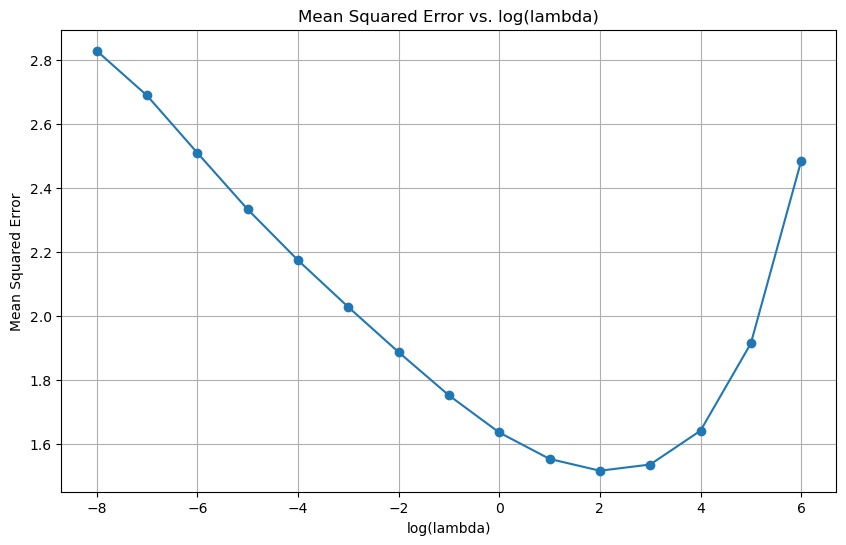

Best regularization parameter (lambda): 7.3891


In [9]:
# Create a range of lambda values in log scale
lambdas = np.exp(np.linspace(-8, 6, 15))

# Store mean MSE for each lambda
mse_means = []

# Perform cross-validation for each lambda value
for alpha in lambdas:
    ridge_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    
    # Calculate the MSE using 10-fold cross-validation
    mse_scores = cross_val_score(ridge_pipeline, transformed_feature_sets["set_1"], target, cv=10, scoring='neg_mean_squared_error')
    mean_mse = -mse_scores.mean()  # Convert to positive MSE for analysis
    mse_means.append(mean_mse)

# Plot MSE vs. log(lambda)
plt.figure(figsize=(10, 6))
plt.plot(np.log(lambdas), mse_means, marker='o', linestyle='-')
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. log(lambda)')
plt.grid(True)
plt.show()

# Find the optimal lambda
best_lambda = lambdas[np.argmin(mse_means)]
print(f"Best regularization parameter (lambda): {best_lambda:.4f}")


Based on the plot and the calculated best regularization parameter, the optimal \($\lambda$\) value is approximately **7.3891**. This value was determined as the point where the mean squared error (MSE) is minimized on the plot, indicating the best balance between bias and variance for your Ridge regression model.

### Why Does the Error Increase as ($\lambda \rightarrow 0$\)?
As ($\lambda \rightarrow 0$\), the Ridge regression model resembles an ordinary least squares (OLS) regression model with minimal regularization. In this scenario:
- **Variance is High**: The model becomes sensitive to noise in the data and risks overfitting, leading to high variance.
- **Bias is Low**: Since there's little to no regularization, the model is flexible and has low bias.
  
Thus, the model suffers from high variance, resulting in increased error due to overfitting.

### Why Does the Error Increase as \($\lambda \rightarrow \infty$\)?
As \($\lambda \rightarrow \infty$\), the regularization penalty becomes extreme, driving the model coefficients close to zero. This behavior results in:
- **Bias is High**: With an overly simplified model (coefficients near zero), the model is unable to capture important patterns in the data, leading to high bias.
- **Variance is Low**: The model is highly constrained and less sensitive to training data variations, which keeps variance low.

In this case, the model has high bias and low variance, resulting in increased error due to underfitting.

### Summary (Bias-Variance Trade-Off)
The best \($\lambda $\) value (7.3891) represents a balance between bias and variance, minimizing the mean squared error. At this point:
- The model has **sufficient flexibility** to capture meaningful patterns (low enough bias).
- The model **avoids overfitting** by controlling the impact of noise (low enough variance).

This balanced trade-off results in the lowest error on the validation set.


### Question 7: Test error  (10 pts)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

In [13]:
# Fit the Ridge model on the entire training set using the best lambda
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=7.3891))
])
ridge_pipeline.fit(transformed_feature_sets["set_1"], target)  # Train on all features with polynomial terms

# Prepare the test set with polynomial features
test_features = test_data.drop(columns=['overall'])
test_features_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_features)
test_target = test_data['overall']

# Make predictions on the test set
predictions = ridge_pipeline.predict(test_features_poly)

# Calculate Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(test_target, predictions)

# Calculate 95% confidence interval for MSE
mse_diffs = (test_target - predictions) ** 2
mse_se = np.std(mse_diffs) / np.sqrt(len(mse_diffs))
mse_ci_lower = mse_test - 1.96 * mse_se
mse_ci_upper = mse_test + 1.96 * mse_se

# Calculate R^2 (Proportion of Variance Explained) on the test set
ss_total = np.sum((test_target - np.mean(test_target)) ** 2)
ss_residual = np.sum((test_target - predictions) ** 2)
r2_test = 1 - (ss_residual / ss_total)

# Calculate 95% confidence interval for R^2
# Approximate standard error for R^2
r2_se = np.sqrt((4 * (1 - r2_test) ** 2) / (len(test_target) - 2))
r2_ci_lower = r2_test - 1.96 * r2_se
r2_ci_upper = r2_test + 1.96 * r2_se

# Print results
print(f"Mean Squared Error (Test): {mse_test:.4f}")
print(f"95% Confidence Interval for MSE: ({mse_ci_lower:.4f}, {mse_ci_upper:.4f})\n")
print(f"Proportion of Variance Explained (R^2): {r2_test:.4f}")
print(f"95% Confidence Interval for R^2: ({r2_ci_lower:.4f}, {r2_ci_upper:.4f})")


Mean Squared Error (Test): 1.7057
95% Confidence Interval for MSE: (1.3818, 2.0297)

Proportion of Variance Explained (R^2): 0.9669
95% Confidence Interval for R^2: (0.9611, 0.9727)


## Question 8: Analyzing Ridge Coefficients (15 pts)
In this question, you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. Based on these observations, draw conclusions about the results in question 4. 

In [15]:
# Fit PolynomialFeatures on the original features to get the feature names
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(features_all)  # Fit on the training data to get feature names
feature_names = poly.get_feature_names_out(features_all.columns)

# Retrieve the Ridge model from the pipeline
ridge_model = ridge_pipeline.named_steps['ridge']

# Extract coefficients for the model
coefficients = ridge_model.coef_

# Identify and collect coefficients related to 'standing_tackle', 'composure', and 'marking'
features_of_interest = ['standing_tackle', 'composure', 'marking']
coefficients_dict = {feature: [] for feature in features_of_interest}

for i, feature_name in enumerate(feature_names):
    for feature in features_of_interest:
        if feature in feature_name:
            coefficients_dict[feature].append(coefficients[i])

# Calculate the mean of the coefficients for each feature
mean_coefficients = {feature: np.mean(coeffs) for feature, coeffs in coefficients_dict.items()}

# Print the results
for feature, mean_coeff in mean_coefficients.items():
    print(f"Mean coefficient for {feature}: {mean_coeff:.4f}")


Mean coefficient for standing_tackle: 0.0237
Mean coefficient for composure: 0.0180
Mean coefficient for marking: 0.0143


## Question 9: Lasso Regression (10 pts)
Let us assume that you are building a linear regression model using only three features: standing tackle, marking, and composure to predict a player's overall rating. Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

In Lasso regression, the regularization term penalizes the absolute values of the coefficients, driving some of them to zero, effectively performing feature selection. Based on the results from Question 8, where `standing_tackle` had the highest mean coefficient, followed by `composure` and then `marking`, we can expect `standing_tackle` to retain a relatively higher coefficient. `Composure` might also retain a non-zero coefficient but may be slightly lower due to the penalization. Given its lower impact, `marking` is the most likely to have its coefficient driven to zero by the Lasso regularization, as it contributes the least predictive power among the three features. This selective shrinking will allow Lasso to create a simpler, more interpretable model by focusing on the most important predictors.


## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 